<a href="https://colab.research.google.com/github/GIftSibusiso/Git_repos/blob/master/Copy_of_BEDA_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health and demographic data for the period 2014-2015


## 1. Missing values

In [29]:
from matplotlib import pyplot as plt
import pandas as pd

database = pd.read_csv("data.csv")
missing_values = database.isnull().sum()
total = sum(missing_values)

print("Number of missing values per column:\n", missing_values, "\n\nTotal number of missing values =", total)

Number of missing values per column:
 Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64 

Total number of missing values = 330


The columns have no relationship meaning we cannot use the available data to calculate missing values and predicting/estimating missing values by observing the given data will also result to inaccurate analysis of data. It is best to remove/filter missing data relative to the analysis and work with only the given data to get more precise results.

## 2. Problems with data

In [30]:
print(database.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

Except the missing values there are no other problems in the data.

## 3. Countries with the lowest or highest percentage of population under 15

In [31]:
lowest_percentage_under15 = min(database["Under15"])
lowest_country_under15 = database[database["Under15"] == lowest_percentage_under15]["Country"]

highest_percentage_under15 = max(database["Under15"])
highest_country_under15 = database[database["Under15"] == highest_percentage_under15]["Country"]

print(f"Lowest population country:\nPercentage = {lowest_percentage_under15}%\n{lowest_country_under15}\n")
print(f"Highest population country:\nPercentage = {highest_percentage_under15}%\n{highest_country_under15}")


Lowest population country:
Percentage = 13.12%
85    Japan
Name: Country, dtype: object

Highest population country:
Percentage = 49.99%
123    Niger
Name: Country, dtype: object


Japan is the country with the lowest percentage of population under 15, out of 127 000 000 people only 16 663 000 people are under 15 meaning about 13.12% of its population is under 15. The country with the highest percentage population under 15 is Niger with a percentage of 49.99% meaning out of 17 157 000 people 8 577 000 people are under 15.

Observing the two countries(Japan and Niger) you can conclude that the country with the highest number of population within it has the lesser number of people under 15 and comversely.

## 4. Region with the highest percentage of population over 60

In [44]:
regions = list(database.drop_duplicates(subset="Region", keep="first", inplace=False)["Region"])
print("List of regions and their population percentage over 60:")
for region in regions:
  region_mean = sum(database[database["Region"] == region]["Over60"]) / len(database[database["Region"] == region]["Over60"])
  
  print(f">>> {region} = {region_mean}%")


List of regions and their population percentage over 60:
>>> Eastern Mediterranean = 5.62%
>>> Europe = 19.77490566037736%
>>> Africa = 5.2206521739130425%
>>> Americas = 10.943714285714286%
>>> Western Pacific = 10.162962962962963%
>>> South-East Asia = 8.76909090909091%


Europe is the region with the highest percentage of population over 60 with a total population of 904 315 000 about 178 827 000 people are over 60 leading to the percentage of 19.77% of its population over 60.

## 5. Relationship between fertility Rate and income

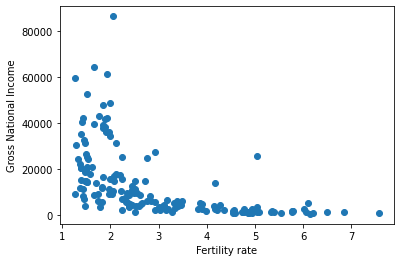

In [27]:
plt.scatter(database["FertilityRate"], database["GNI"])
plt.xlabel("Fertility rate")
plt.ylabel("Gross National Income")
plt.show()

Observing the graph you can see that the smaller the fertility rate the higher the income and visa versa, yes the fertility decrease as income increases. There are a few countries that do not follow this trend you can easily spot them on the graph above as they do not follow the majority but on their own.

## 6. Region with lowest literacy rate

In [49]:
lowest_literacy_region = 0
literacy_database = database[database["LiteracyRate"].notnull()]
print("List of regions and the percentage of their literacy rate:")
for region in regions:
  mean_region_literacy = literacy_database[literacy_database["Region"] == region]["LiteracyRate"].sum() / len(literacy_database[literacy_database["Region"] == region]["LiteracyRate"])
  print(f">>> {region} = {mean_region_literacy}%")


List of regions and the percentage of their literacy rate:
>>> Eastern Mediterranean = 82.52000000000001%
>>> Europe = 98.78076923076922%
>>> Africa = 69.09166666666664%
>>> Americas = 92.43529411764705%
>>> Western Pacific = 90.12222222222222%
>>> South-East Asia = 71.78%


Africa is the region with the lowest literacy rate, out of 607 782 000 people only 419 927 000 people are literate leading  to a literacy rate of 69.09% which is followed by South-East Asia with a literacy rate of 71.78% meaning out of 257 483 000 people only 184 821 000 are literate.

## 7. Region with lowest child mortality rate

In [52]:
print("List of regions and their average child mortality rate:")
for region in regions:
  mean_region_child_mortality = database[database['Region'] == region]['ChildMortality'].sum() / len(database[database['Region'] == region]['ChildMortality'])

  print(f">>> {region} = {mean_region_child_mortality}")

List of regions and their average child mortality rate:
>>> Eastern Mediterranean = 40.25
>>> Europe = 10.050943396226414
>>> Africa = 84.03695652173914
>>> Americas = 19.322857142857146
>>> Western Pacific = 24.711111111111112
>>> South-East Asia = 35.04545454545455


Europe, Americas and Western Pacific are the regions with the lowest child mortality rate at 10.05, 19.32 and 24.71 respectivily. 

## 8. Life expectancy across different regions

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


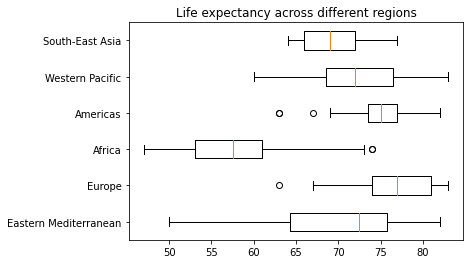

In [63]:
eastern_mediterranean_LE = database[database["Region"] == regions[0]]["LifeExpectancy"]
europe_LE =database[database["Region"] == regions[1]]["LifeExpectancy"]
africa_LE = database[database["Region"] == regions[2]]["LifeExpectancy"]
Americas_LE = database[database["Region"] == regions[3]]["LifeExpectancy"]
western_pacific_LE = database[database["Region"] == regions[4]]["LifeExpectancy"]
south_east_asia_LE = database[database["Region"] == regions[5]]["LifeExpectancy"]
region_LE = [eastern_mediterranean_LE, europe_LE, africa_LE, Americas_LE, western_pacific_LE, south_east_asia_LE]

plt.boxplot(region_LE, labels=regions, vert=False)
plt.title("Life expectancy across different regions")
plt.show()


Observing the above diagram you can tell that Africa is the region with the lowest life expectancy since the average life expactancy of any region in the diagram is located within the interquartile range(2nd and 3rd quaters) meaning African countries people live shorter compared to other regions and Europe is the region with the greatest life expactancy compared to others, Europeans live longer than other regions. The Eastern Mediterranean has the widest range of life expectancy compared every other region(life expactancy is more spread out) and the Americas has a narrow range of life expactacy.

## 9. Relationship between Life expectancy and wealth

<function matplotlib.pyplot.show>

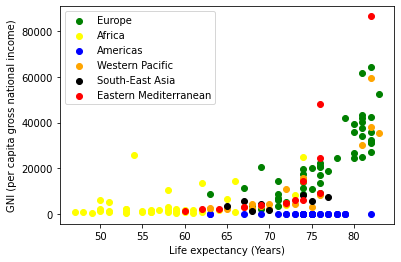

In [67]:
eastern_mediterranean_wealth = database[database["Region"] == regions[0]]["GNI"]
europe_wealth = database[database["Region"] == regions[1]]["GNI"]
africa_wealth = database[database["Region"] == regions[2]]["GNI"]
Americas_wealth = database[database["Region"] == regions[3]]["GNI"]
western_pacific_wealth = database[database["Region"] == regions[4]]["GNI"]
south_east_asia_wealth = database[database["Region"] == regions[5]]["GNI"]

plt.scatter(europe_LE, europe_wealth, label=regions[1], color="green")
plt.scatter(africa_LE, africa_wealth, label=regions[2], color="yellow")
plt.scatter(Americas_LE, Americas_LE, label=regions[3], color="blue")
plt.scatter(western_pacific_LE, western_pacific_wealth, label=regions[4], color="orange")
plt.scatter(south_east_asia_LE, south_east_asia_wealth, label=regions[5], color="black")
plt.scatter(eastern_mediterranean_LE, eastern_mediterranean_wealth, label=regions[0], color="red")
plt.legend()
plt.xlabel("Life expectancy (Years)")
plt.ylabel("GNI (per capita gross national income)")
plt.show

For Europe, Western Pacific, Eastern Mediterranean and South-East Asia as their countries countries wealth increase their life expectancy also increase but in some regions the increse is slow i.e South-East Asia.Africa and Amaricas regions are constant, as life expectancy increase their wealth remains the same but in Africa there is a slight increase in wealth as life expactancy increase thus the outliers in the graph. 

## Relationship between wealth and fertility

<function matplotlib.pyplot.show>

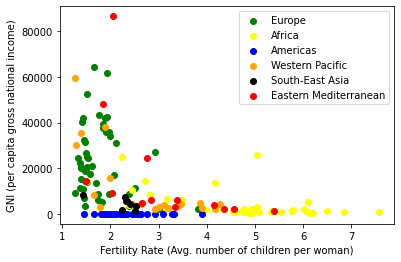

In [68]:
eastern_mediterranean_fertility = database[database["Region"] == regions[0]]["FertilityRate"]
europe_fertility = database[database["Region"] == regions[1]]["FertilityRate"]
africa_fertility = database[database["Region"] == regions[2]]["FertilityRate"]
Americas_fertility = database[database["Region"] == regions[3]]["FertilityRate"]
western_pacific_fertility = database[database["Region"] == regions[4]]["FertilityRate"]
south_east_asia_fertility = database[database["Region"] == regions[5]]["FertilityRate"]

plt.scatter(europe_fertility, europe_wealth, label=regions[1], color="green")
plt.scatter(africa_fertility, africa_wealth, label=regions[2], color="yellow")
plt.scatter(Americas_fertility, Americas_LE, label=regions[3], color="blue")
plt.scatter(western_pacific_fertility, western_pacific_wealth, label=regions[4], color="orange")
plt.scatter(south_east_asia_fertility, south_east_asia_wealth, label=regions[5], color="black")
plt.scatter(eastern_mediterranean_fertility, eastern_mediterranean_wealth, label=regions[0], color="red")
plt.legend()
plt.xlabel("Fertility Rate (Avg. number of children per woman)")
plt.ylabel("GNI (per capita gross national income)")
plt.show

In Europe, Western Pacific, South-East Asia and Eastern Mediterranean an increase in fertility rate results to a decrease in wealth and visa versa. Africa and Americas both are constant meaning an increase in fertility rate results to the same wealth but in Africa there are few countries not following the trend.

## 10. Relationship between life expactancy and literacy rate

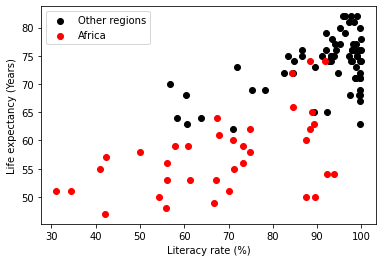

In [77]:
africa_literacy = database[database["Region"] == regions[2]]["LiteracyRate"]
other_regions_LE = database[database["Region"] != "Africa"]["LifeExpectancy"]
other_regions_literacy = database[database["Region"] != "Africa"]["LiteracyRate"]

plt.scatter(other_regions_literacy, other_regions_LE, label="Other regions", color="black")
plt.scatter(africa_literacy, africa_LE, label="Africa",color="red")
plt.xlabel("Literacy rate (%)")
plt.ylabel("Life expectancy (Years)")
plt.legend()
plt.show()

In other regions as literacy rate increase life expectancy also increase but for African countries as literacy rate increase life expactancy remains constant but there are a few outliers that follow the trend of the other regions.

More than half of literacy rate values were missing in the provided dataset leading to the above observation to be a bit inaccurate, so we can not be too confident about the above analysis.